In [34]:
import pandas as pd

train = pd.read_csv('data/past_matches_results_train.csv')
test = pd.read_csv('data/past_matches_results_test.csv')

In [119]:
features = ['home_team_score',
            'home_opponent_score',
            'home_past_wins',
            'home_past_ties',
            'home_past_losses',
            'home_past_ppg',
            'away_team_score',
            'away_opponent_score',
            'away_past_wins',
            'away_past_ties',
            'away_past_losses',
            'away_past_ppg',
           ]
train_x = train[features]
train_y = train['score_home']
test_x = test[features]
test_y = test['score_home']

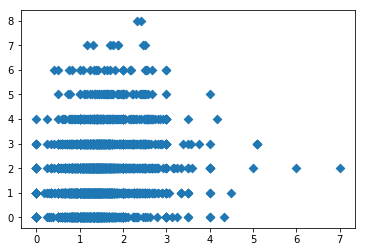

In [122]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(train_x['home_team_score'], train_y, marker='D')
plt.show()

In [110]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_x, train_y)
pred_y = clf.predict(test_x)

In [112]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
pred_y = clf.fit(train_x, train_y).predict(test_x)

In [71]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=20)
pred_y = clf.fit(train_x, train_y).predict(test_x)

In [142]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)
pred_y = clf.fit(train_x, train_y).predict(test_x)

In [128]:
110 / len(test_y)

0.3313253012048193

In [143]:
correct = 0
for i in range(len(pred_y)):
    if pred_y[i] == test_y[i]:
        correct += 1
print(correct / float(len(pred_y)))

0.2710843373493976


In [56]:
count = 0
for el in test_y:
    if el:
        count += 1
print(count / float(len(test_y)))

0.7379518072289156
